In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib.ticker import FuncFormatter

In [18]:
#reading the dataset
df=pd.read_csv(r'C:\Users\Srushti\Downloads\adidasUS.csv')

In [19]:
# viewing the first few rows of the dataset
# the head() function displays the first 5 rows of the dataframe
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$6,00,000","$3,00,000",0.50,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$5,00,000","$1,50,000",0.30,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$4,00,000","$1,40,000",0.35,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",0.35,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",0.30,In-store


In [20]:
#Wherever there is null values drop those column/row
df.dropna(inplace=True)

In [21]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$6,00,000","$3,00,000",0.50,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$5,00,000","$1,50,000",0.30,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$4,00,000","$1,40,000",0.35,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",0.35,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",0.30,In-store


In [22]:
#rename columns
df.columns=["Retailer","Retailer Id","Invoice Date","Region","State","City","Product","Price Per Unit","Units Sold","Total Sales","Operating Profit","Operating Margin","Sales Method"]

In [23]:
df.head()

,Retailer,Retailer Id,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$6,00,000","$3,00,000",0.50,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$5,00,000","$1,50,000",0.30,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$4,00,000","$1,40,000",0.35,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",0.35,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",0.30,In-store


In [24]:
#removing the 3rd row
df.drop(index=3,inplace=True)

In [25]:
df.head()

,Retailer,Retailer Id,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$6,00,000","$3,00,000",0.50,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$5,00,000","$1,50,000",0.30,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$4,00,000","$1,40,000",0.35,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",0.30,In-store
5,Foot Locker,1185732,06-01-2020,Northeast,New York,New York,Women's Apparel,$50.00,1000,"$5,00,000","$1,25,000",0.25,In-store


In [26]:
#1. Number of records in the dataset
df.shape[0]

9647

In [27]:
#2. Which region produced the highest sales and profit
def clean_and_sum(column):
    # Ensure all values are strings and handle potential errors
    return column.apply(
        lambda x: sum(
            [
                float(value.replace("$", "").replace(",", "")) 
                for value in str(x).split() 
                if value.replace("$", "").replace(",", "").replace(".", "").isdigit()
            ]
        )
    )

# Remove invalid rows or check for issues in the data
# This assumes the dataset is clean except for extra headers in the columns
try:
    # Clean and sum Total Sales and Operating Profit columns
    df["Total Sales"] = clean_and_sum(df["Total Sales"])
    df["Operating Profit"] = clean_and_sum(df["Operating Profit"])
    
    # Group by Region and calculate total sales and operating profit
    sales_by_region = df.groupby('Region')['Total Sales'].sum()
    profit_by_region = df.groupby('Region')['Operating Profit'].sum()

    # Print results
    print("Total Sales by Region:")
    print(sales_by_region)

    print("\nOperating Profit by Region:")
    print(profit_by_region)
except Exception as e:
    print("Error during processing:", e)


Total Sales by Region:
Region
Midwest      135800459.0
Northeast    185941567.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: Total Sales, dtype: float64

Operating Profit by Region:
Region
Midwest      52811412.0
Northeast    67886813.0
South        61138044.0
Southeast    60555462.0
West         89609516.0
Name: Operating Profit, dtype: float64


In [28]:
#3 which state produced the highest sales and profit
def clean_and_sum(column):
    return column.apply(
        lambda x: sum(
            [
                float(value.replace("$", "").replace(",", "")) 
                for value in str(x).split() 
                if value.replace("$", "").replace(",", "").replace(".", "").isdigit()
            ]
        )
    )


try:
    df["Total Sales"] = clean_and_sum(df["Total Sales"])
    df["Operating Profit"] = clean_and_sum(df["Operating Profit"])
    
    # Group by Region and calculate total sales and operating profit
    sales_by_region = df.groupby('State')['Total Sales'].sum()
    profit_by_region = df.groupby('State')['Operating Profit'].sum()

    # Print results
    print("Total Sales by State:")
    print(sales_by_region)

    print("\nOperating Profit by State:")
    print(profit_by_region)
except Exception as e:
    print("Error during processing:", e)


Total Sales by State:
State
Alabama           17633424.0
Alaska            14753103.0
Arizona           15782221.0
Arkansas          12639347.0
California        60174133.0
Colorado          20996536.0
Connecticut       11573448.0
Delaware          12298412.0
Florida           59283714.0
Georgia           18997466.0
Hawaii            22282457.0
Idaho             19276878.0
Illinois           9797488.0
Indiana            8836198.0
Iowa               7424011.0
Kansas             9972864.0
Kentucky          10072848.0
Louisiana         23750781.0
Maine              9195978.0
Maryland           7758059.0
Massachusetts     11076810.0
Michigan          18625433.0
Minnesota          7378068.0
Mississippi       15591709.0
Missouri           9683265.0
Montana           15710886.0
Nebraska           5929038.0
Nevada            20858509.0
New Hampshire     16411667.0
New Jersey         9934246.0
New Mexico        19865016.0
New York          63846539.0
North Carolina    23956531.0
North Dakota   

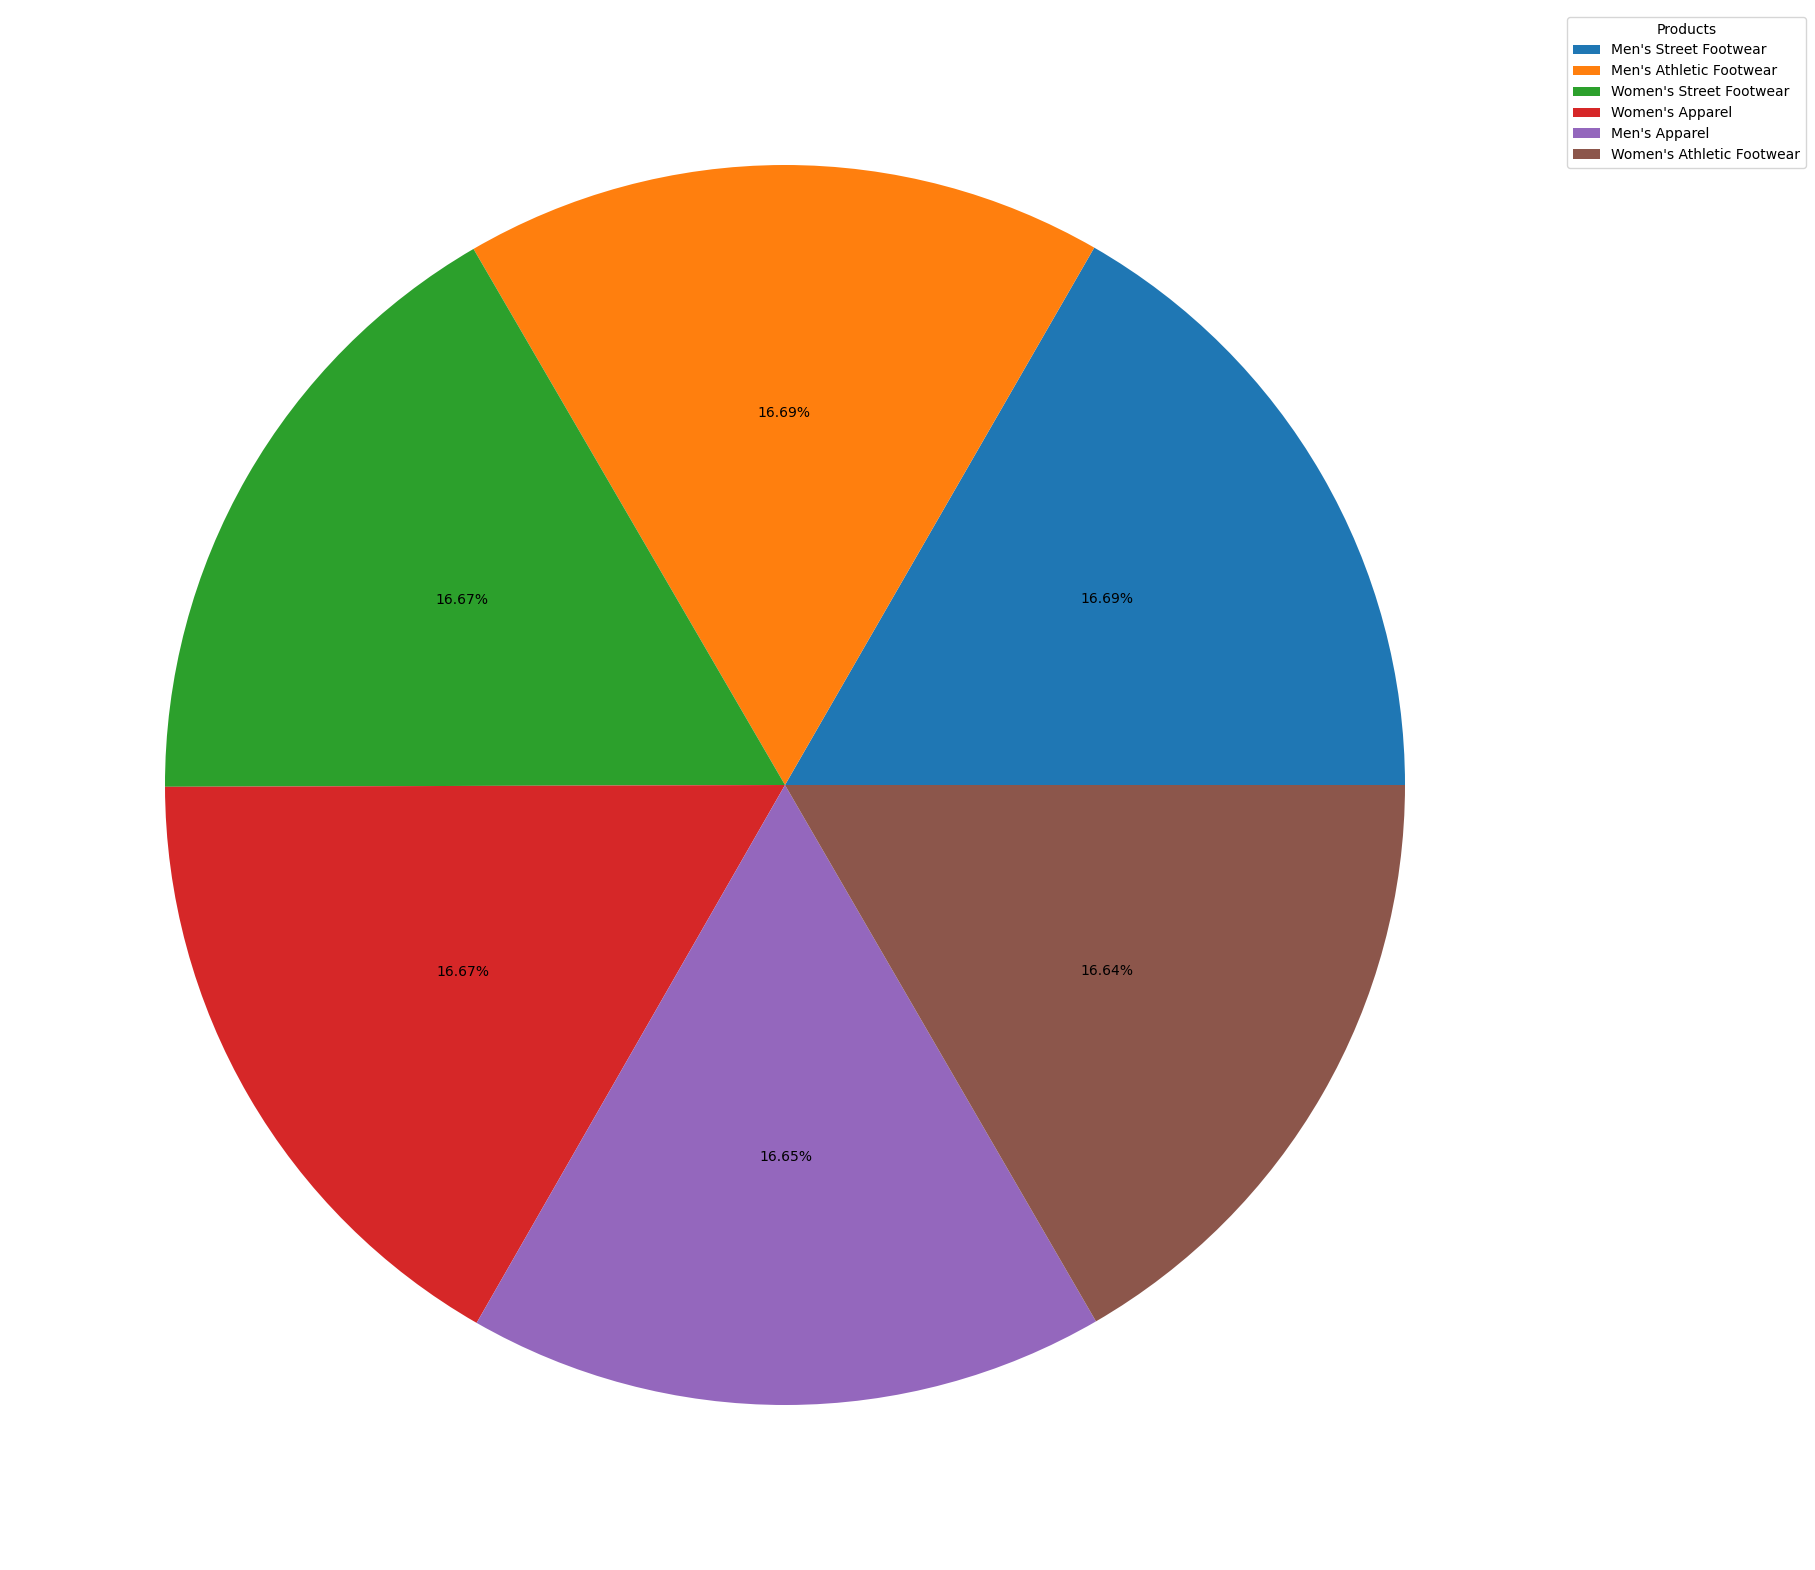

In [29]:
#4.Product distribution
plt.figure(figsize=(20,30))
product_count=df['Product'].value_counts()
plt.pie(product_count,autopct='%2.2f%%')
plt.legend(product_count.index, title="Products", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

In [30]:
#5 How many products are being sold through store, online,and outlet

# Create the cross-tabulation
d = pd.crosstab(df['Product'], df['Sales Method'])

# Reset the index to make it positional
d_reset = d.reset_index()

# Drop the row at position 3 (4th row)
d_reset.drop(index=3, inplace=True)



# Set the index back if you need to
d_reset.set_index('Product', inplace=True)

# Print the result
print(d_reset)


Sales Method               In-store  Online  Outlet
Product                                            
Men's Apparel                   291     813     502
Men's Athletic Footwear         289     816     505
Men's Street Footwear           290     816     504
Women's Athletic Footwear       289     814     502
Women's Street Footwear         290     815     503


In [31]:
#6 which state is ordering a particular product and  in what quantity
plt.figure(figsize=(10,10))
state_product=pd.crosstab(df['Product'],df['City'])
print(state_product)

City                       Albany  Albuquerque  Anchorage  Atlanta  Baltimore  \
Product                                                                         
Men's Apparel                  24           36         22       36         24   
Men's Athletic Footwear        24           36         26       36         24   
Men's Street Footwear          24           36         26       36         24   
Women's Apparel                24           36         24       36         24   
Women's Athletic Footwear      24           36         22       36         24   
Women's Street Footwear        24           36         24       36         24   

City                       Billings  Birmingham  Boise  Boston  Burlington  \
Product                                                                      
Men's Apparel                    24          36     36      36          36   
Men's Athletic Footwear          24          36     36      36          36   
Men's Street Footwear            24    

<Figure size 1000x1000 with 0 Axes>

In [33]:
print(df.dtypes)

Retailer             object
Retailer Id           int64
Invoice Date         object
Region               object
State                object
City                 object
Product              object
Price Per Unit      float64
Units Sold          float64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
dtype: object


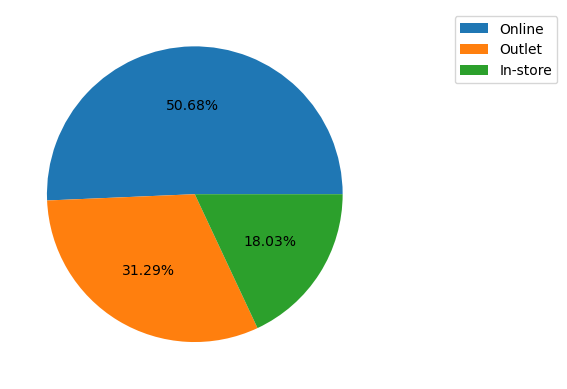

In [34]:
#7. Product sales through different sales method 
sales_method_count=df['Sales Method'].value_counts()
plt.pie(sales_method_count,autopct='%2.2f%%')
plt.legend(sales_method_count.index,loc="upper right",bbox_to_anchor=(1, 0, 0.5, 1))

In [35]:
#8. Year & Month column creation
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d-%m-%Y')
df['Year']=df['Invoice Date'].dt.year
df['Month']=df['Invoice Date'].dt.month_name().str[:3]
df.head()

,Retailer,Retailer Id,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,Jan
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,Jan
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,Jan
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,Jan
5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000.0,500000.0,125000.0,0.25,In-store,2020,Jan


C:\Users\Srushti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Srushti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Total Sales'>

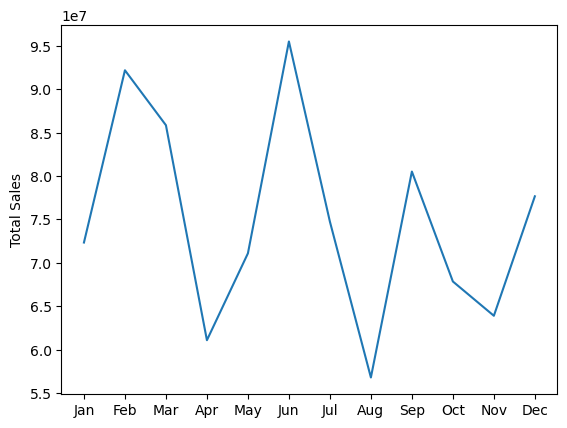

In [89]:
#9 Total Sales Over time 
month_by_sales=df.groupby('Month')['Total Sales'].sum().reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sbn.lineplot(month_by_sales,x=month_order,y='Total Sales')

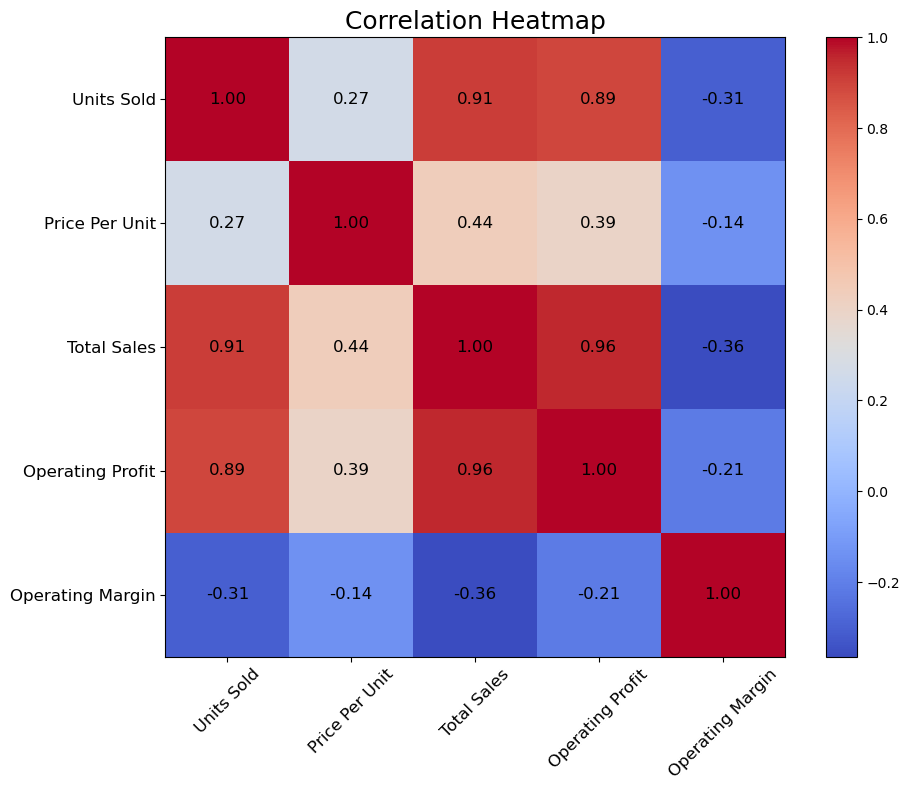

In [57]:
#10. Relation between operating profit,units sold,price per unit,total sales
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = df[['Units Sold', 'Price Per Unit', 'Total Sales', 'Operating Profit', 'Operating Margin']].corr()


plt.figure(figsize=(10, 8))  # Adjust size for better visibility
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")  # Create heatmap with color mapping

# Add colorbar for better understanding of scale
plt.colorbar()


plt.xticks(np.arange(corr.shape[1]), corr.columns, rotation=45, fontsize=12)  # x-axis labels
plt.yticks(np.arange(corr.shape[1]), corr.columns, fontsize=12)  # y-axis labels


plt.title("Correlation Heatmap", fontsize=18)


for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()  
plt.show()



<Axes: xlabel='Product', ylabel='Operating Profit'>

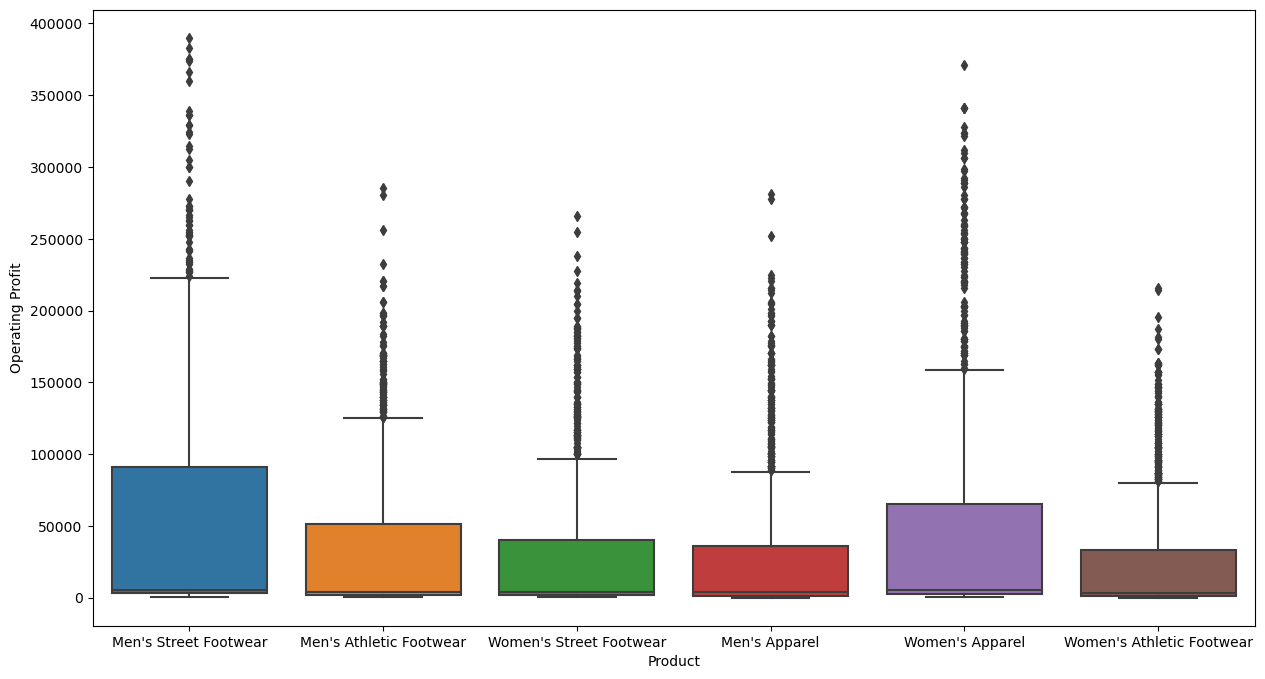

In [60]:
#11. Comparing product and their profits using boxplots
plt.figure(figsize=(15,8))
sbn.boxplot(x='Product',y='Operating Profit',data=df)

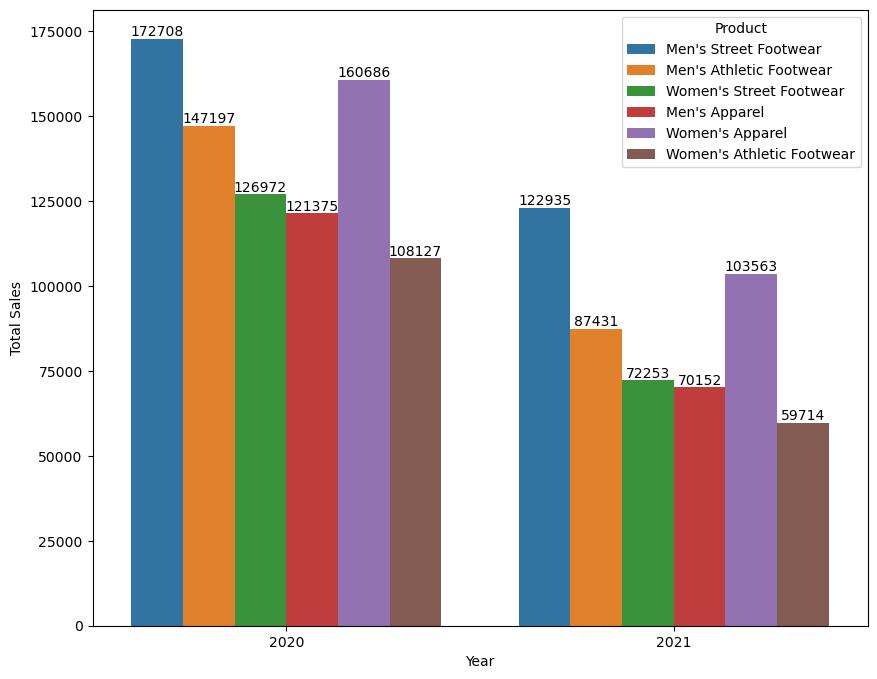

In [88]:
# 12. plotting a barplot to highlight the product and their total sales in the respective years
plt.figure(figsize=(10,8))
ax=sbn.barplot(x='Year',y='Total Sales',hue='Product',data=df,errorbar=None)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Get the height of each bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            height,  # Y position (top of the bar)
            f'{height:.0f}',  # The label (Sales or Profit value)
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
            fontsize=10,  # Font size for the label
            color='black'  # Label color
        )

C:\Users\Srushti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


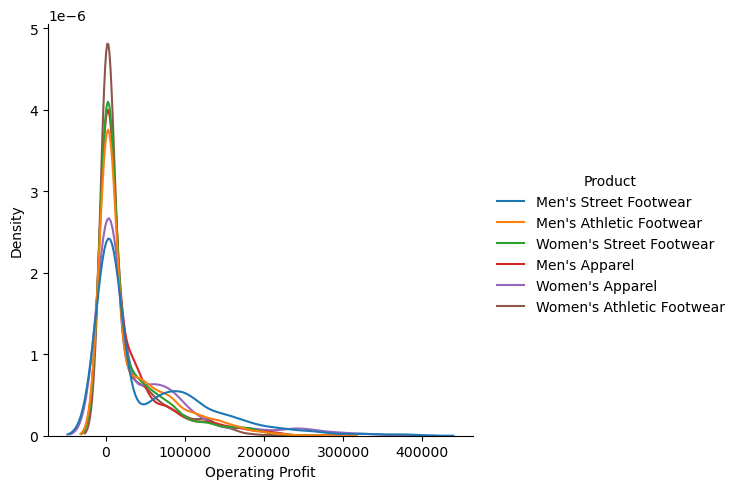

In [75]:
# 14. plotting a distplot to visualize the distribution of Profits Product-wise
sbn.displot(x='Operating Profit',data=df, kind='kde', hue='Product')

In [81]:
a=df.groupby('Year')['Total Sales'].sum()
b=df.groupby('Year')['Operating Profit'].sum()
print(a)
print(b)

Year
2020    181698175.0
2021    717821450.0
Name: Total Sales, dtype: float64
Year
2020     63241835.0
2021    268759412.0
Name: Operating Profit, dtype: float64


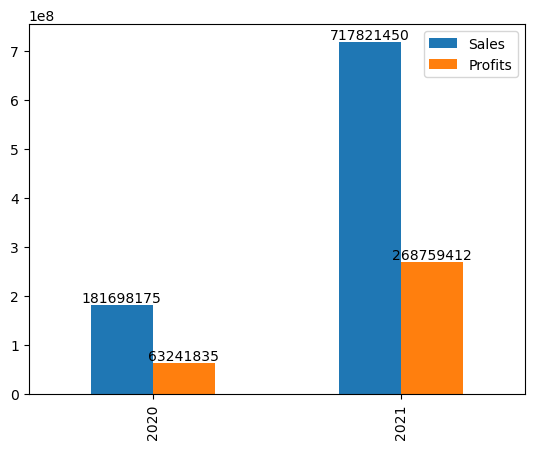

In [90]:
#15 Year wise sales and peofits
Sales = [181698175,717821450]
Profit = [63241835,268759412]
year = ['2020', '2021']

# converting the results into a dataframe
compare = pd.DataFrame({'Sales':Sales, 'Profits':Profit}, index=year)

# 15. plotting the dataframe
ax=compare.plot.bar()


for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Get the height of each bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
            height,  # Y position (top of the bar)
            f'{height:.0f}',  # The label (Sales or Profit value)
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
            fontsize=10,  # Font size for the label
            color='black'  # Label color
        )